<h1>From DataCamp - Intermediate Python 5. Case Study: Hacker Statistics</h1>

Imagine the following: you're walking up the empire state building to DataCamp HeadQuarters and you're playing a game with a friend.

* You throw a die one hundred times.

* If it's 1 or 2 you'll go one step down.

* If it's 3, 4, or 5, you'll go one step up.

* If you throw a 6, you'll throw the die again and will walk up the resulting number of steps.

Of course, you can not go lower than step number 0. And also, you admit that you're a bit clumsy and have a chance of 0.1% of falling down the stairs when you make a move. Falling down means that you have to start again from step 0. With all of this in mind, you bet with your friend that you'll reach 60 steps high.

How to solve it?
What is the chance that you will win this bet? It's a complex assignment. One way to solve it would be to calculate the chance analytically using equations. Another possible approach is to simulate this process thousands of times and see in what fraction of the simulations you will reach 60 steps. This is a form of -hacker statistics-. As you can probably guess, we're going to opt for the second approach.

In [29]:
# Data Treatment
# ===============================================================================================================
import numpy as np

# Data Visualization
# ===============================================================================================================
import matplotlib.pyplot as plt

# Warning Setup
# ===============================================================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set the seed, pseudo random number, getting the exact random number (consistent between runs).
np.random.seed(123)

# Generate and print random float
print(np.random.rand())

0.6964691855978616


In [5]:
# Use randint() to simulate a dice. 7 not included
print(np.random.randint(1,7))

# Use randint() again
print(np.random.randint(1,7))

4
3


In [16]:
# Starting step
step = 50

# Roll the dice
dice = np.random.randint(1,7)

# Finish the control construct
if dice <= 2 :
    step = step - 1
elif dice <= 5 :
    step = step + 1
else :
    step = step + np.random.randint(1,7)

# Print out dice and step
print(dice)
print(step)

6
55


<h2>Random Walk</h2>

1. Random Step
If you use a dice to determine your next step, you can call this a random step. What if you use a dice 100 times to determine your next step? You would have a succession of random steps, or in other words, a random walk.
<br><br>
2. Random Walk
This is a well-known concept in science. For example, the path traced by a molecule as it travels in a liquid or a gas can be modelled as a random walk. The financial status of a gambler is another example. To record every step in your random walk, you need to learn how to gradually build a list with a for a loop.
<br><br>
3. Heads or Tails
Have a look at this code. It keeps the outcomes for playing a game of heads or tails ten times, with the random number generator we coded up in the previous video. After importing NumPy and setting the seed for the random number generator, we initialize an empty list of "outcomes". Next, we build a for loop that should run ten times. We can do this with the range() function, which generates a list of numbers that you can use to iterate over. Inside this for loop, we generate a random integer coin that's either zero or one. Zero corresponds to heads, 1 to tails. If the coin is zero, we append the string heads to the list. Else, we append the string tails. In both cases, we do this with the append method, which you learned about in the intro course. Finally, we print the outcomes list we've built up in these 10 iterations. If we run this script, eventually a list with 10 strings will be printed out. This list is random, but it's not a random walk, because the items in the list are not based on the previous ones. It's just a bunch of random steps.
<br><br>
4. Heads or Tails: Random Walk
You could turn this example into a random walk by tracking the -total- number of tails while you're simulating the game. In this case, you start by creating a list, tails, that already contains the number 0, because at the start, you haven't thrown any tails. Then you again start a for loop that runs 10 times, using the range function. In there, you again generate a random number. Instead of the if-else structure, you can simplify things. If the coin is 0, so heads, the number of tails you've thrown shouldn't change. If a 1 is generated, the number of tails should be incremented with 1. This means that you can simply add the coin to the previous number of tails, and add this count to the list with append. Finally, you again print the list tails. After running this script, a list with 11 elements will be printed out. The final element in this list tells you how often tails were thrown.
<br><br>
5. Step to Walk
If you compare the output of the first script to the output of the second script, you can see that the numbers in the tails list are incremented by one each time you threw tails. This is exactly how a bunch of random steps are converted into a random walk.

In [23]:
# Initialize random_walk
random_walk = [0]

# Complete the
for x in range(100) :
    # Set step: last element in random_walk
    step = random_walk[-1]

    # Roll the dice again...
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = step - 1
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)
    
# Print random_walk
print(random_walk)

[0, 1, 2, 1, 7, 6, 7, 6, 5, 6, 10, 11, 12, 13, 14, 13, 12, 11, 10, 9, 10, 11, 12, 13, 14, 15, 14, 15, 16, 15, 16, 17, 20, 19, 20, 19, 20, 23, 24, 25, 26, 25, 24, 27, 28, 29, 30, 29, 28, 29, 32, 33, 38, 39, 38, 39, 38, 39, 38, 44, 43, 42, 43, 45, 44, 43, 42, 43, 44, 45, 46, 50, 55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 66, 65, 66, 67, 66, 72, 71, 72, 73, 72, 71, 72, 71, 70, 76, 75, 74, 75]


In [20]:
# Initialize random_walk
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Replace below: use max to make sure step can't go below 0
        step = max(0, step -1)
    elif dice <= 5:
        step = max(step + 1, step -1)
    else:
        step = max(step + np.random.randint(1,7), step -1)

    random_walk.append(step)

print(random_walk)

[0, 1, 0, 0, 6, 5, 6, 7, 8, 9, 10, 11, 12, 13, 12, 13, 12, 11, 12, 11, 12, 11, 12, 13, 17, 18, 17, 23, 22, 21, 22, 21, 20, 21, 20, 24, 23, 24, 23, 24, 23, 24, 26, 25, 24, 23, 24, 23, 28, 29, 30, 29, 28, 29, 28, 29, 28, 33, 34, 33, 32, 31, 30, 31, 32, 36, 42, 43, 44, 45, 46, 45, 46, 48, 49, 50, 51, 50, 49, 50, 49, 50, 51, 52, 51, 52, 53, 54, 53, 52, 53, 54, 59, 60, 61, 66, 65, 66, 65, 66, 67]


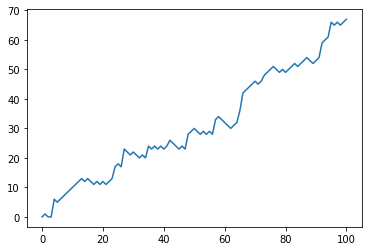

In [22]:
# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

<h2>Distribution</h2>
Let's go back to the initial problem. You throw a dice one hundred times. Depending on the result you go some steps up or some steps down. This is called a random walk, and you know how to simulate this. But you still have to answer the main question: what is the chance that you'll reach 60 steps high? I'll give you a hint. Each random walk will end up on a different step. If you simulate this walk a thousand times, you will end up with thousands of final steps. This is actually a distribution of final steps. And once you know the distribution, you can start calculating chances.

* Random Walk
Let's go back to the example of the total number of tails after 10 coin tosses. The number of tails starts at zero and, ten times, we calculate a random number which is either 0 or 1. We then update the number of times tails have been thrown by appending it to the list.
<br><br>
* 100 runs
To find the distribution of this walk, we start by setting a random seed and then create an empty list named final_tails. This list will contain the number of tails you end up with if you play this game of tossing a coin 10 times over and over again. Let's write a for loop that runs 100 times. Inside this for loop, we put the code from before, which gradually builds up the tails list. After simulating this single game, we append the last number, so the number of tails after tossing 10 times, to the final_tails list. Notice that the indentation here specifies that this last line is part of the top-level for loop. If you put the last line in here to print final_tails, outside of the for loops, and run the script, you see that final_tails contains numbers between 0 and 10. Each number is the number of tails that were thrown in a game of 10 tosses. All these values actually represent a distribution, that we can visualize. Hmm, visualizing a distribution, that calls for a histogram!
<br><br>
* Histogram, 100 runs
On the top of the script, we add a line to import pyplot, and then, instead of the print statement, we call the hist function and specify that we want 10 bins. Of course, to actually display the plot, we need plt (dot) show().
<br><br>
* Histogram, 100 runs
If we run the script, the resulting histogram already gives an idea but is not very smooth yet.
<br><br>
* Histogram, 1,000 runs
Let's head back to the code, and now simulate the coin toss game one thousand times, by changing the range in the top-level for loop.
<br><br>
* Histogram, 1,000 runs
This time, the histogram already looks better.
<br><br>
* Histogram, 10,000 runs
If we change the code to do ten thousand simulations,
<br><br>
* Histogram, 10,000 runs
Running the script once more, the distribution starts to converge to a bell shape. In fact, it starts to look like the theoretical distribution. That means the distribution that you would find by doing analytical pen-and-paper calculations. Ideally, you want to carry out the experiment zillions of times to get a distribution that is exactly the same as the theoretical distribution. This will take too much computer time, though, but ten thousand already gives a pretty good estimate. From this curve, we can see that in around 2500 games of the 10000 games played, you end up with tails 5 times.

In [25]:
# Initialize all_walks
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

# Print all_walks
print(all_walks)

[[0, 1, 0, 5, 6, 7, 13, 14, 15, 14, 13, 14, 15, 16, 17, 18, 19, 20, 25, 24, 23, 22, 23, 24, 25, 24, 28, 34, 35, 40, 41, 40, 41, 47, 46, 47, 46, 47, 46, 47, 46, 47, 52, 53, 52, 53, 54, 55, 56, 55, 56, 57, 58, 57, 58, 61, 60, 61, 62, 63, 64, 67, 66, 65, 71, 72, 74, 77, 78, 81, 82, 83, 84, 85, 86, 87, 86, 87, 88, 87, 88, 87, 86, 87, 90, 89, 88, 89, 90, 89, 90, 96, 95, 96, 95, 96, 97, 96, 95, 94, 96], [0, 0, 5, 6, 9, 10, 11, 12, 17, 23, 26, 29, 28, 29, 30, 29, 32, 31, 32, 33, 34, 35, 34, 35, 36, 42, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 56, 62, 64, 63, 66, 69, 70, 69, 68, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 84, 83, 84, 83, 84, 83, 84, 83, 82, 83, 84, 85, 84, 85, 84, 89, 88, 87, 88, 92, 93, 94, 93, 94, 93, 94, 93, 92, 91, 92, 93, 94, 95, 94, 95, 94, 95, 96, 95, 96, 95, 96, 95, 94, 95, 96], [0, 1, 2, 1, 3, 5, 6, 7, 6, 7, 8, 9, 8, 13, 12, 13, 14, 13, 17, 21, 27, 28, 27, 28, 29, 30, 29, 33, 34, 38, 37, 38, 39, 40, 41, 42, 43, 44, 43, 42, 43, 42, 43, 42, 43, 44, 49, 54, 53, 52, 53, 54, 55

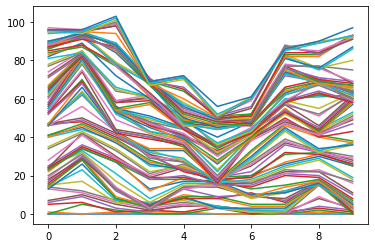

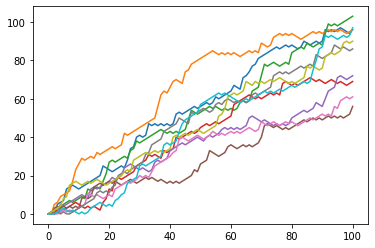

In [26]:
# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)

# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

There's still something we forgot! You're a bit clumsy and you have a 0.1% chance of falling down. That calls for another random number generation. Basically, you can generate a random float between 0 and 1. If this value is less than or equal to 0.001, you should reset the step to 0.

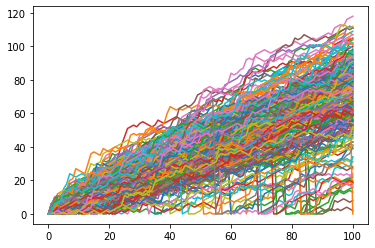

In [31]:
all_walks = []

# Simulate random walk 250 times
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

All these fancy visualizations have put us on a sidetrack. We still have to solve the million-dollar problem: What are the odds that you'll reach 60 steps high on the Empire State Building?

Basically, I want to know about the endpoints of all the random walks you've simulated. These endpoints have a certain distribution that you can visualize with a histogram.

Note that if the code is taking too long to run, you might be plotting a histogram of the wrong data!

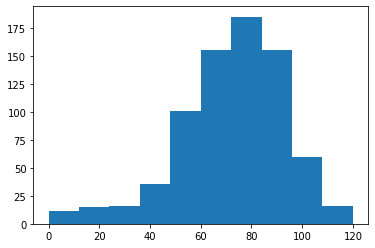

In [32]:
# Simulate random walk 500 times
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1 , :]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

The histogram of the previous exercise was created from a NumPy array ends, that contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

Well then, what's the estimated chance that you'll reach at least 60 steps high if you play this Empire State Building game? The ends array is everything you need; it's available in your Python session so you can make calculations in the IPython Shell. (78.4%)

In [54]:
# the chance that this end point is greater than or equal to 60
chance = 0

for i in ends:
    if i >= 60:
        chance += 1
print('The chance that this end point is greater than or equal to 60 is:',
      '{:,.4f}%'.format(chance/len(ends)*100))

The chance that this end point is greater than or equal to 60 is: 76.1333%


In [35]:
print(ends)

[ 60  84  88  59  78   2  65  85  66  73  69  86  84  54  54  92  61  77
  45  88  90  71  13  87  79  59  69  97  90  55  69  20 111  87  67  79
  75  68  67  72  86  78  77  47  53  94 102  94  34  31  77  83  77 105
  88  50 118  63  88  48  41  85 104  18  74 111  66  89  72  85  59  86
  50  89  90  55  23  81  80  67  56  59  84  43  48   8  24  85  45 109
  59  94  67  64  98  73  75  93  75  97  55  92  22  80  94  70  66  52
  43  85  56  68  19  63  81  63  82  43  65  96  54  71  16  83  65  92
  83  82  39  64  39  18  91  67 111  56  54  75 112  72  60 104  86  84
  91  86  63  68  77  90  83 107  49  51  83  74 107  86  46 102  61   0
  65  19  92  87  88  85  54  93  89  65  95  85  53  83 101  60  65  34
  56 101  98  58  79  28  58  71  75  86  81  95  75  60  53  65  77  81
  76  96  92  41  66  79  60  64  16  82  41  64  52  27  57  62  91  72
  94  85  74  46  63  63  58 100  82  90  94  49  72  99  87  82  78  62
  61  80  82  85  91  80  76  75  95  59  72  53  7